# **딥러닝 분류기 만들기**

## **데이터**
해당 실습에서는 CIFA10 데이터셋을 사용한다. 이미지 분류 데이터셋이며 10가지 클래스(비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배 ,트럭) 중에 하나로 이미지를 분류하는 문제이다. 이미지 각각은 3x32x32 차원을 갖고 있다. 즉 RGB값이 담긴 32x32 픽셀의 이미지다.

![이미지](https://pytorch.org/tutorials/_images/cifar10.png)

이미지 분류기 학습은 다음 과정을 따른다.

1.   CIFAR10 학습/테스트 데이터셋 불러오기
2.   뉴럴 네트워크 정의하기
3.   손실 함수(loss function) 정의하기
4.   모델 학습하기
5.   모델 테스트하기





1.   데이터셋 불러오기

이 슬습에서는 torchvision 라이브러리를 사용한다.



In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [7]:
transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0,5),(0.5,0.5,0.5))])
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size=4

trainset=torchvision.datasets.CIFAR10(root='./data',train=True,
                                      download=True, transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,
                                        shuffle=True,num_workers=2)

testset=torchvision.datasets.CIFAR10(root='./data',train=False,
                                     download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,
                                       shuffle=False,num_workers=2)

classes=('plane','car','bird','cat',
         'deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


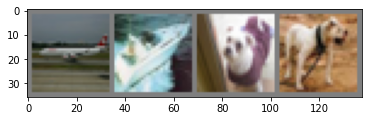

plane  ship   dog   dog


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

dataiter=iter(trainloader)
images, labels=dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s'%classes[labels[j]]for j in range(batch_size)))



2.   뉴럴 네트워크 정의하기

이미지 학습에서 널리 쓰이는 CNN(Convolutional Neural Network)을 정의한다.



In [10]:
import torch.nn as nn
from torch.nn.functional import relu

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,x):
    x=self.pool(relu(self.conv1(x)))
    x=self.pool(relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=relu(self.fc1(x))
    x=relu(self.fc2(x))
    x=self.fc3(x)
    return x

net=Net()



3.   손실 함수 정의하기

손실 함수는 모델의 성능을 측정하고 파라미터를 어떤 방향으로 바꿔야 하는지 알려주는 역할을 한다.


In [11]:
import torch.optim as optim

criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)



4.   모델 학습하기

딥러닝 모델의 학습은 경사 하강법(gradient descent)으로 한다. pytorch는 경사 하강법을 손쉽게 할 수 있도록 기능들을 제공한다.



In [13]:
for epoch in range(2): # 데터셋을 여러번 돈다.

  running_loss=0.0
  for i, data in enumerate(trainloader):
    inputs, labels= data

    # 기존에 계산한 gradient를 지운다.
    optimizer.zero_grad()

    # 모델 결과를 계산하고, 미분하고, 미분값에 따라 파라미터를 조정한다.
    outputs=net(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    # 통계치를 뽑아본다
    running_loss+=loss.item()
    if i % 2000==1999:  # 2000번 학습마다 한번 씩 출력한다
        print('[%d,%5d] loss: %.3f' %
              (epoch +1,i+1,running_loss/2000))
        running_loss=0.0

print('Finished Traning')

[1, 2000] loss: 2.186
[1, 4000] loss: 1.795
[1, 6000] loss: 1.656
[1, 8000] loss: 1.560
[1,10000] loss: 1.516
[1,12000] loss: 1.460
[2, 2000] loss: 1.379
[2, 4000] loss: 1.349
[2, 6000] loss: 1.320
[2, 8000] loss: 1.292
[2,10000] loss: 1.273
[2,12000] loss: 1.277
Finished Traning




5.  모델 테스트하기

모델이 보지 못했던 데이터에서 성능을 구해보자. 먼저 눈으로 확인해보기 위해 테스트로 쓸 데이터를 고른다.



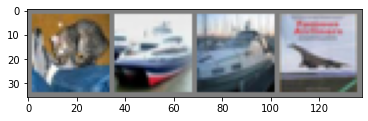

GroungTruth:    cat  ship  ship plane


In [16]:
dataiter=iter(testloader)
images,labels=dataiter.next()

# 테스트 이미지를 살펴보자
imshow(torchvision.utils.make_grid(images))
print('GroungTruth: ',' '.join('%5s' % classes[labels[j]] for j in range(4)))

모델을 돌려서 이미지에 대한 추론 결과를 구해본다.

In [17]:
outputs=net(images)

In [18]:
outputs

tensor([[-1.6131, -2.2064,  0.7744,  3.1834,  0.1376,  1.9669,  1.8722, -0.3519,
         -2.0136, -1.5746],
        [ 6.2028,  5.5393, -3.0746, -2.7132, -2.6687, -4.6705, -4.9780, -5.1831,
          8.0957,  3.6472],
        [ 2.3846,  1.6529, -0.6828, -0.8255, -1.4434, -1.8517, -2.5071, -1.6554,
          3.2061,  1.4449],
        [ 3.9708,  0.5299, -0.0759, -1.5378,  0.2656, -3.5681, -2.2409, -2.8964,
          4.1774,  0.0363]], grad_fn=<AddmmBackward0>)

In [19]:
_, predicted=torch.max(outputs,1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


전체 테스트 데이터셋에서 정량적인(quantitative) 성능 지표를 구해본다.

In [20]:
correct=0
total=0
with torch.no_grad():
  for data in testloader:
    images, labels=data
    outputs=net(images)
    _, predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' %(
    100*correct/total))

Accuracy of the network on the 10000 test images: 53 %
